<div class="alert alert-block alert-info" style="margin-top: 20px"> 
<h3 align="center">  _____________   <h3/>
<h3 align="center"> || CREDIT CARD FRAUD DETECTION || <h3/>
<h3 align="center">  _____________    <h3/>
   
</div>

In [1]:
# We start by importing all our necessary libraries for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# We insert the dataset, available in kaggle

data = pd.read_csv("Downloads/credit.csv")
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Well, here columns like V1, V2 and all others have been obtained using PCA[Principal Component Analysis] over the original dataset. 
Because of the security & confidential issues of all creditcardholders, it has been done this way. Only the time and amount
attributes couldn't be taken into this computation process, so they remain unchanged in a way now. 

In [3]:
print("Number of rows the dataset holds:",data.shape[0],'\n& \nNumber of columns goes:',data.shape[1])

Number of rows the dataset holds: 284807 
& 
Number of columns goes: 31


In [4]:
# Perform isnull to see if any rows with null values exist.

print("Existance of missing values in our dataset:",data.isnull().values.any())

# Let's see it in a list
data.isnull().sum().sort_values(ascending=False).head(5)

Existance of missing values in our dataset: False


Time      0
V16       0
Amount    0
V28       0
V27       0
dtype: int64

> Our dataset doesn't contain any null value. We count it as a good thing.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


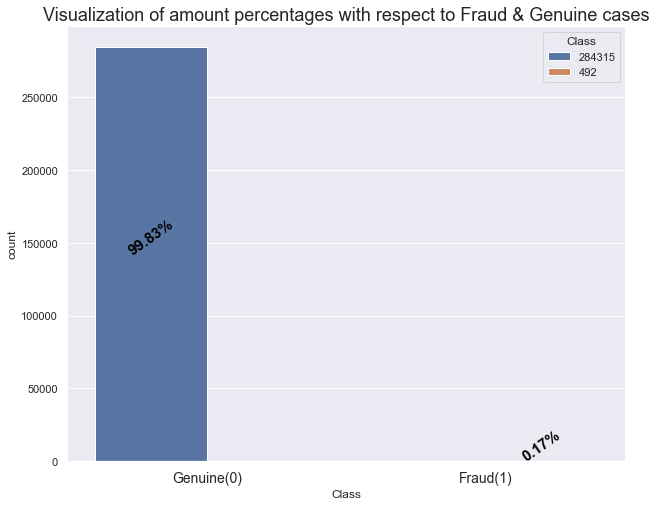

In [5]:
fig, ax = plt.subplots(1 ,1, figsize = (10, 8))

ax = sns.countplot("Class", data=data, hue="Class", ax=ax)
for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2, s = f"{np.round(i.get_height()/len(data)*100, 2)}%",
            ha = 'center', size = 15, weight = 'bold', rotation = 35, color = 'black')
ax.set_xticklabels(['Genuine(0)', 'Fraud(1)'], fontsize = 14)
plt.title("Visualization of amount percentages with respect to Fraud & Genuine cases",size=18)
plt.legend(title="Class", labels = data["Class"].value_counts(), loc="upper right")
plt.show()

> This dataset is totally out of balance. As this is seen that **fraud cases** happened to be **492 times** out of total **284315 times** of **genuine cases**. We need to take care of that. We will try it through resampling or precision/sensitivity using Confusion-Matrix

In [6]:
# as we don't have anything missing here. Now let's drop all unnecessary columns. 

data.drop(['Time'],axis=1,inplace=True)

# We consider the 'time' column as a complete unnecessary addition to our main objective, so just dropped it. 

In [7]:
data.groupby('Class').sum().iloc[:,:10]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
Class,,,,,,,,,,
0,2347.798634,-1782.898826,3460.374276,-2234.678319,1550.402644,687.686462,2739.815693,-280.75286,1269.912477,2793.026372
1,-2347.798633,1782.898826,-3460.374276,2234.678319,-1550.402644,-687.686462,-2739.815693,280.75286,-1269.912477,-2793.026372


> It's not good to look at their sum values rather than averages. It really doesn't offer any clear picture about whichever attribute does create a good effect on two class values. Let's better analyze attributes individually depending on their genuine & fraud cases. 

In [8]:
genuine = data[data["Class"] == 0]; fraud = data[data["Class"] == 1]


# we take sample of size 10000 just to reduce the run time & for more flexibility of analysis
genuine = genuine.sample(n=10000)

In [9]:
genuine.Amount.describe()

count    10000.000000
mean        82.933333
std        212.801400
min          0.000000
25%          5.490000
50%         22.000000
75%         75.000000
max       6000.000000
Name: Amount, dtype: float64

In [10]:
# now create a final dataset by joining these two dataframes
df = fraud.append(genuine)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


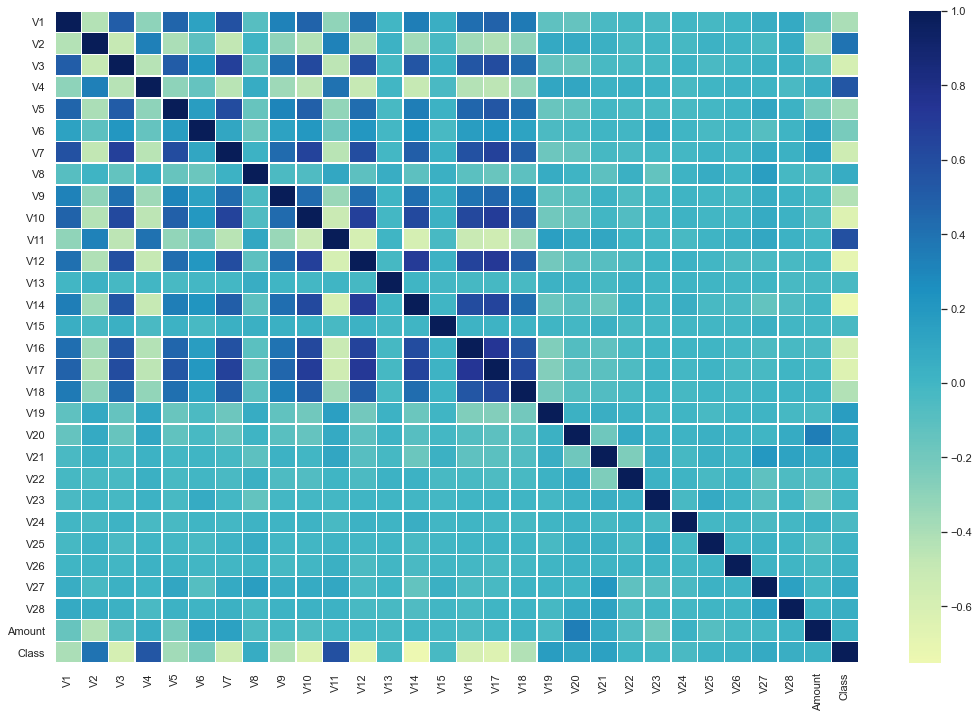

In [11]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, center=0, linewidths=0.4, cmap="YlGnBu", cbar=True)
plt.show()

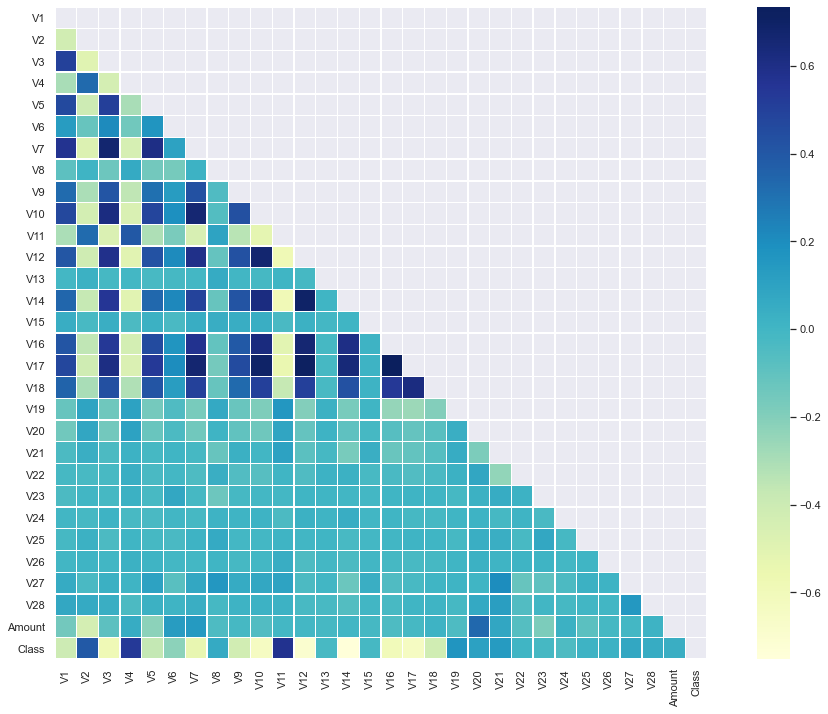

In [12]:
plt.figure(figsize=(18,12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, center=0, square=True, linewidths=.4, cmap="YlGnBu")
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics           # for model evaluation
from sklearn.model_selection import train_test_split   # for splitting data

In [14]:
ss = StandardScaler()   

df["Amount"] = ss.fit_transform(df["Amount"].values.reshape(-1,1))

### Predictor & Target Variable set

In [15]:
X = df.iloc[:,:-1]
y = df.loc[: , 'Class']

In [16]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=1/3, random_state=42)

print ('Train set:', train_X.shape,  train_y.shape)
print ('Test set:', test_X.shape,  test_y.shape)

Train set: (6994, 29) (6994,)
Test set: (3498, 29) (3498,)


In [17]:
features = X.columns
features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

### Defining some functions for future purposes

In [18]:
# to get accuracy scores for model evaluation

def metrics_(model_name, test_y,y_pred):
    
    acc_sc = metrics.accuracy_score(test_y,y_pred)
    recall = metrics.recall_score(test_y,y_pred)
    preci = metrics.precision_score(test_y,y_pred)
    f1 = metrics.f1_score(test_y,y_pred)
    
    print("For model {}:\n".format(model_name))
    
    print("accuracy score : {}".format(acc_sc))
    print("Recall score : {}".format(recall))
    print("precision score : {}".format(preci))
    print("F1 score : {}\n".format(f1))

    
def cf_plot(model_name, test_y,y_pred):
    
    con_mat = metrics.confusion_matrix(test_y, y_pred)
    print("Confusion Matrix for {} is:\n".format(model_name))
    plt.figure(figsize=(10,7))
    sns.heatmap(con_mat, annot=True, fmt='0.0f', cmap="YlGnBu", xticklabels=['Genuine', 'Fraud'],
                yticklabels=['Genuine', 'Fraud'])
    plt.xlabel('Predicted values',size=18)
    plt.ylabel('Actual values',size=18)
    plt.title('Confusion Matrix ',size=22)
    plt.show()

In [19]:
def feature_imp(model_object):
    
    
    f = pd.DataFrame({'Features': features, 'Feature importances': model_object.feature_importances_})
    f.sort_values(by='Feature importances',ascending=False, inplace=True)
    plt.figure(figsize=(15,8))
    sns.barplot(x='Features',y='Feature importances', data=f, palette="BuGn_r")
    plt.title("Feature Importance using RandomForest",size=15)
    plt.xticks(rotation=45)
    plt.show()

### Classification models building

In [20]:
# K Nearest Neighbor

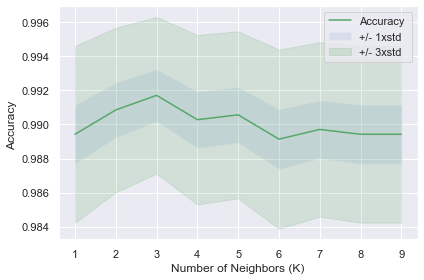

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# iterate model training process for 10 k values to find out the best value of k that offers the best prediction

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(train_X,train_y)
    ypred_knn = knn.predict(test_X)
    mean_acc[n-1] = metrics.accuracy_score(test_y, ypred_knn)    
    std_acc[n-1]=np.std(ypred_knn==test_y)/np.sqrt(ypred_knn.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

> It is clear from above that k=3 offers the best accuracy for this model. So, we are going to predict the model using k=3.    
[ k = number of centroids of clusters ]

In [22]:
print( "The best accuracy was with", np.round(mean_acc.max(),3), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.992 with k= 3


In [23]:
# final prediction with k = 3

knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(train_X,train_y)
ypred_knn1 = knn1.predict(test_X)

In [24]:
metrics_('K-Nearest Neighbors', test_y,ypred_knn1)

For model K-Nearest Neighbors:

accuracy score : 0.9917095483133219
Recall score : 0.8491620111731844
precision score : 0.987012987012987
F1 score : 0.912912912912913



In [25]:
# Logistic Regression   

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01, solver='liblinear')
lr.fit(train_X,train_y)
ypred_lr = lr.predict(test_X)
ypred_lr_prob = lr.predict_proba(test_X)

In [27]:
metrics_('Logistic Regression', test_y,ypred_lr)

For model Logistic Regression:

accuracy score : 0.9897084048027445
Recall score : 0.8212290502793296
precision score : 0.9735099337748344
F1 score : 0.8909090909090909



In [28]:
from sklearn.metrics import jaccard_score     # ranges from 0 to 1. higher the value, better the prediction
from sklearn.metrics import log_loss          # ranges from 0 to 1. Lower the value, better the prediction

print("Jaccard Score for Logistic Regression is: {}\n".format(jaccard_score(test_y, ypred_lr,pos_label=0)))
print("Logloss Score for Logistic Regression is: {}".format(log_loss(test_y, ypred_lr_prob)))

Jaccard Score for Logistic Regression is: 0.9892569382273948

Logloss Score for Logistic Regression is: 0.07746199607018042


In [29]:
# Random Forest 

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf.fit(train_X,train_y)
ypred_rf = rf.predict(test_X)

In [31]:
metrics_('Random Forest Classifier', test_y,ypred_rf)

For model Random Forest Classifier:

accuracy score : 0.9917095483133219
Recall score : 0.8491620111731844
precision score : 0.987012987012987
F1 score : 0.912912912912913



In [32]:
# We will apply another classifier, Xgboost (Extreme Gradient Boosting)
# As we know, it is considered as faster than other ensemble classifiers, also it offers a bunch of tuning parameters.


# XGBoost

[01:33:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For model XGBoost:

accuracy score : 0.9911377930245855
Recall score : 0.8547486033519553
precision score : 0.9683544303797469
F1 score : 0.9080118694362018

Confusion Matrix for XGBoost is:



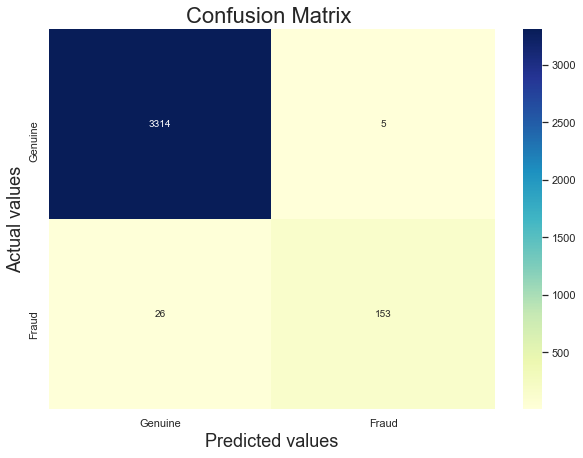

In [33]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(train_X,train_y)
ypred_xgb = xgb.predict(test_X)
metrics_('XGBoost', test_y, ypred_xgb)
cf_plot('XGBoost', test_y, ypred_xgb)

### Let's summarize the score values of these above classifiers in one single dataframe

In [34]:
Models = ['K-NN','Logistic','Random Forest']
acc = np.round([metrics.accuracy_score(test_y,ypred_knn1),metrics.accuracy_score(test_y,ypred_lr),
       metrics.accuracy_score(test_y,ypred_rf)],3)
rc = np.round([metrics.recall_score(test_y,ypred_knn1),metrics.recall_score(test_y,ypred_lr),
               metrics.recall_score(test_y,ypred_rf)],3)
pr = np.round([metrics.precision_score(test_y,ypred_knn1),metrics.precision_score(test_y,ypred_lr),
               metrics.precision_score(test_y,ypred_rf)],3)
f1 = np.round([metrics.f1_score(test_y,ypred_knn1),metrics.f1_score(test_y,ypred_lr),
               metrics.f1_score(test_y,ypred_rf)],3)



dataframe = pd.DataFrame({'Models':Models , 'Recall/Sensitivity':rc , 'Accuracy_Score':acc , 'Precision':pr , 'F1_Score':f1})
dataframe

,Models,Recall/Sensitivity,Accuracy_Score,Precision,F1_Score
0,K-NN,0.849,0.992,0.987,0.913
1,Logistic,0.821,0.990,0.974,0.891
2,Random Forest,0.849,0.992,0.987,0.913


<div class="alert alert-block alert-info" style="margin-top: 20px"> 
It seems a good sign that we achieved really good metric scores from each of the classifiers.
But, if you remember we had our dataset in totally imbalanced state. Accuracy in these cases can be a little a biased for imbalanced data. As our model fails to capture the minority class because of the majority portion.

We know,
   
   Recall ( True Positive Rate ) = $ \frac{True Positive}{True Positive + False Negative} $
  
   Accuracy = $ \frac{True Positive + False Positive}{True Positive + False Positive + True Negative + False Negative} $
  
   Precision = $ \frac{True Positive}{True Positive + False Positive}$
  
   F1 = 2 × $ \frac{Precision × Recall}{Precision + Recall}$

Sensitivity/recall describes how good a test is at detecting the positives. So, if False Negative goes down, recall will increase, so will decrease this dataset's imbalanced nature.

We will go for resampling technique to control this high imbalance inaccuracy as it removes samples from the majority class (under-sampling) and adds more samples from the minority class(over-sampling).
    

 The techniques 'll be following here,
                 
           * Random Sampling (Under)
           * Random Sampling (Over)
           * SMOTE


## 
<h3 align="center"> i) Random Under Sampling (With Replacement) <h3/>

> It is used to remove random samples from the majority class(here, Genuine class). In simple word, we use it to
create peace between the majority and the minority classes, I mean to balance them out.

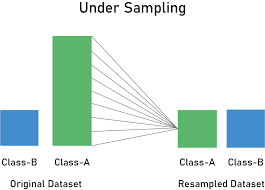

In [35]:
from imblearn.under_sampling import RandomUnderSampler

rs_un = RandomUnderSampler(random_state=42, replacement=True)
train_X_rs_un, train_y_rs_un = rs_un.fit_resample(train_X,train_y)

In [36]:
# K-Nearest Neighbors

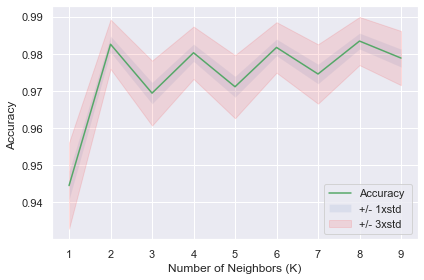

In [37]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(train_X_rs_un, train_y_rs_un)
    ypred_knn = knn.predict(test_X)
    mean_acc[n-1] = metrics.accuracy_score(test_y, ypred_knn)    
    std_acc[n-1]=np.std(ypred_knn==test_y)/np.sqrt(ypred_knn.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="red")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [38]:
print( "The best accuracy was with", np.round(mean_acc.max(),3), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.983 with k= 8


In [39]:
# After resampling final prediction using k = 4

knn2 = KNeighborsClassifier(n_neighbors = 4)
knn2.fit(train_X_rs_un, train_y_rs_un)
ypred_knn2 = knn2.predict(test_X)

For model K-Nearest Neighbors:

accuracy score : 0.9802744425385935
Recall score : 0.8770949720670391
precision score : 0.7696078431372549
F1 score : 0.8198433420365535

Confusion Matrix for K-Nearest Neighbors is:



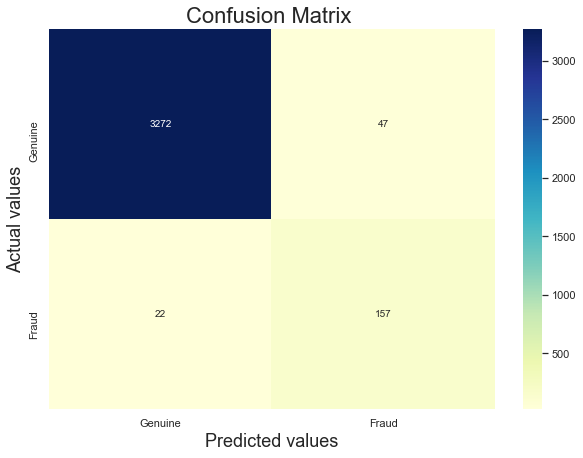

In [40]:
metrics_('K-Nearest Neighbors', test_y,ypred_knn2)
cf_plot('K-Nearest Neighbors', test_y,ypred_knn2)

In [41]:
# Logistic Regression

In [42]:
lr1 = LogisticRegression(C=0.01, solver='liblinear', class_weight='balanced')
lr1.fit(train_X_rs_un, train_y_rs_un)
ypred_lr1 = lr1.predict(test_X)
ypred_lr1_prob = lr1.predict_proba(test_X)

For model Logistic Regression:

accuracy score : 0.9428244711263579
Recall score : 0.9050279329608939
precision score : 0.46956521739130436
F1 score : 0.6183206106870229

Confusion Matrix for Logistic Regression is:



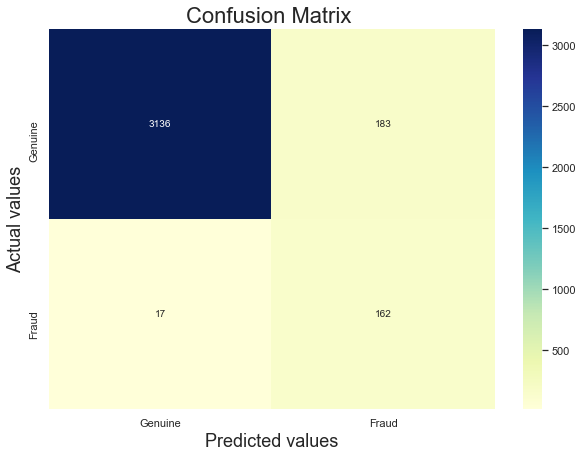

In [43]:
metrics_('Logistic Regression', test_y,ypred_lr1)
cf_plot('Logistic Regression', test_y,ypred_lr1)

> Logistic Regression doesn't offer us any good prediction than k-NN after resampling(under). Precision & F1 scores are too poor to go with. Let's try defining grid search parameters and then hyperparameter tuning the dataset(train), if it falls short, then We will better apply another classifier like Random Forest.

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid_lr2 = {'max_iter': [20, 50, 100, 200, 500, 1000],'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'class_weight': ['balanced']}

lr2_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr2, verbose=1, cv=10, n_jobs=-1)
lr2_grid.fit(train_X_rs_un, train_y_rs_un)
ypred_lr2 = lr2_grid.predict(test_X)
ypred_lr2_prob = lr2_grid.predict_proba(test_X)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


For model Logistic Regression after grid search:

accuracy score : 0.9439679817038308
Recall score : 0.9050279329608939
precision score : 0.4750733137829912
F1 score : 0.6230769230769231

Confusion Matrix for Logistic Regression after grid search is:



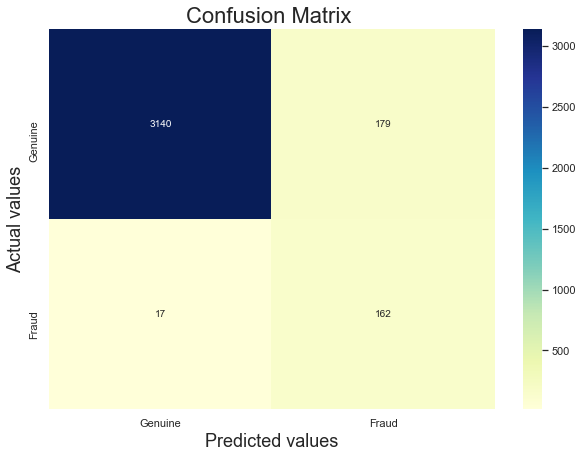

In [45]:
metrics_('Logistic Regression after grid search', test_y,ypred_lr2)
cf_plot('Logistic Regression after grid search', test_y,ypred_lr2)

> It is not good enough to give us good predictions even after applying sampling and hyperparameter tuning. Let's hop off to Random Forest

In [46]:
# Random Forest

In [47]:
rf2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf2.fit(train_X_rs_un, train_y_rs_un)
ypred_rf2 = rf2.predict(test_X)

For model Random Forest(under sampling):

accuracy score : 0.9731275014293882
Recall score : 0.88268156424581
precision score : 0.683982683982684
F1 score : 0.7707317073170732

Confusion Matrix for Random Forest(under sampling) is:



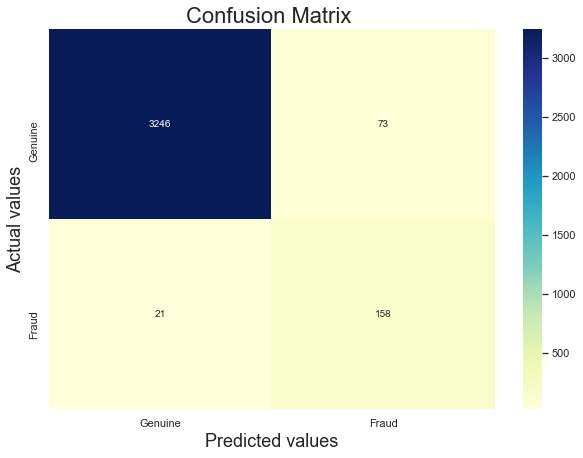

In [48]:
metrics_('Random Forest(under sampling)' , test_y, ypred_rf2)
cf_plot('Random Forest(under sampling)' , test_y, ypred_rf2)

Text(0.5, 1.0, '2-class Precision-Recall curve')

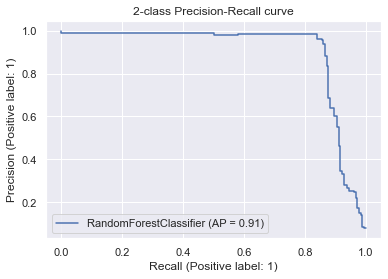

In [49]:
metrics.plot_precision_recall_curve(rf2, test_X, test_y)
plt.title('2-class Precision-Recall curve')

#### Feature Importances

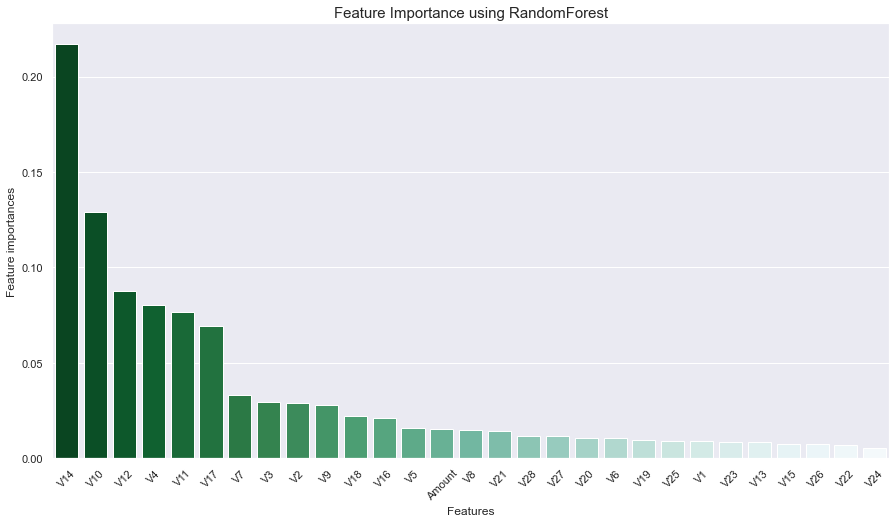

In [50]:
feature_imp(rf2)

### Let's summarize the score values of these above classifiers(after under sampling) in one single dataframe

In [51]:
acc1 = np.round([metrics.accuracy_score(test_y,ypred_knn2),metrics.accuracy_score(test_y,ypred_lr2),
       metrics.accuracy_score(test_y,ypred_rf2)],3)
rc1 = np.round([metrics.recall_score(test_y,ypred_knn2),metrics.recall_score(test_y,ypred_lr2),
               metrics.recall_score(test_y,ypred_rf2)],3)
pr1 = np.round([metrics.precision_score(test_y,ypred_knn2),metrics.precision_score(test_y,ypred_lr2),
               metrics.precision_score(test_y,ypred_rf2)],3)
f1_1 = np.round([metrics.f1_score(test_y,ypred_knn2),metrics.f1_score(test_y,ypred_lr2),
               metrics.f1_score(test_y,ypred_rf2)],3)


dataframe1 = pd.DataFrame({'Models':Models , 'Recall/Sensitivity':rc1 , 'Accuracy_Score':acc1 , 'Precision':pr1 , 'F1_Score':f1_1})

### 
<h3 align="center"> ii) Random Over Sampling <h3/>

> It adds random samples to minority class(here, Fraud class)

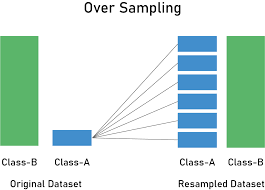

In [52]:
from imblearn.over_sampling import RandomOverSampler

rs_ov = RandomOverSampler(random_state=42)
train_X_rs_ov, train_y_rs_ov = rs_ov.fit_resample(train_X, train_y)

In [53]:
# K-Nearest Neighbors

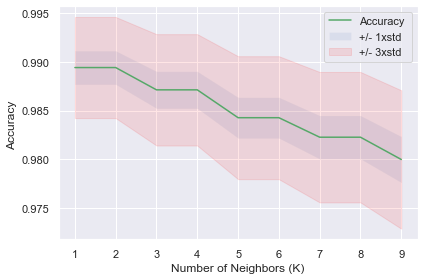

In [54]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(train_X_rs_ov, train_y_rs_ov)
    ypred_knn = knn.predict(test_X)
    mean_acc[n-1] = metrics.accuracy_score(test_y, ypred_knn)    
    std_acc[n-1]=np.std(ypred_knn==test_y)/np.sqrt(ypred_knn.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="red")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [55]:
print( "The best accuracy was with", np.round(mean_acc.max(),3), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.989 with k= 1


In [56]:
# After resampling(over) final prediction using k = 1

knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(train_X_rs_ov, train_y_rs_ov)
ypred_knn3 = knn3.predict(test_X)

For model K-Nearest Neighbors:

accuracy score : 0.9894225271583762
Recall score : 0.8547486033519553
precision score : 0.9329268292682927
F1 score : 0.8921282798833818

Confusion Matrix for K-Nearest Neighbors is:



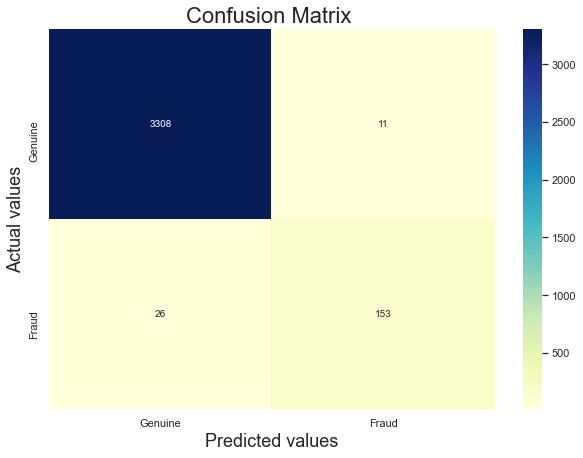

In [57]:
metrics_('K-Nearest Neighbors', test_y,ypred_knn3)
cf_plot('K-Nearest Neighbors', test_y,ypred_knn3)

In [58]:
# Logistic Regression

In [59]:
param_grid_lr3 = {'max_iter': [20, 50, 100, 200, 500, 1000],'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'class_weight': ['balanced']}

lr3_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr3, verbose=1, cv=10, n_jobs=-1)
lr3_grid.fit(train_X_rs_ov, train_y_rs_ov)
ypred_lr3 = lr3_grid.predict(test_X)
ypred_lr3_prob = lr3_grid.predict_proba(test_X)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


For model Logistic Regression after grid search(over):

accuracy score : 0.9742710120068611
Recall score : 0.88268156424581
precision score : 0.6960352422907489
F1 score : 0.7783251231527094

Confusion Matrix for Logistic Regression after grid search(over) is:



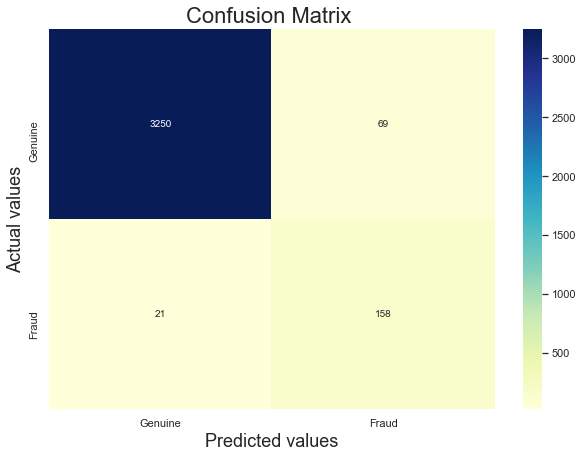

In [60]:
metrics_('Logistic Regression after grid search(over)', test_y,ypred_lr3)
cf_plot('Logistic Regression after grid search(over)', test_y,ypred_lr3)

In [61]:
# Random Forest

In [62]:
rf3 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf3.fit(train_X_rs_ov, train_y_rs_ov)
ypred_rf3 = rf3.predict(test_X)

For model Random Forest(over sampling):

accuracy score : 0.9919954259576901
Recall score : 0.8547486033519553
precision score : 0.9870967741935484
F1 score : 0.9161676646706587

Confusion Matrix for Random Forest(over sampling) is:



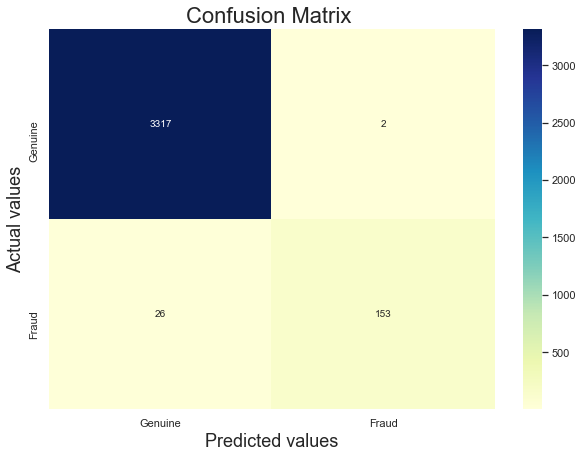

In [63]:
metrics_('Random Forest(over sampling)' , test_y, ypred_rf3)
cf_plot('Random Forest(over sampling)' , test_y, ypred_rf3)

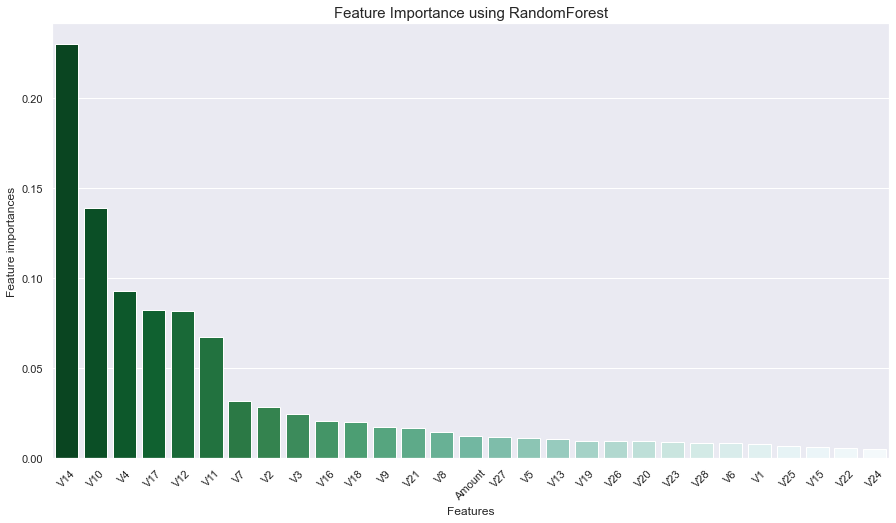

In [64]:
feature_imp(rf3)

In [65]:
acc2 = np.round([metrics.accuracy_score(test_y,ypred_knn3),metrics.accuracy_score(test_y,ypred_lr3),
       metrics.accuracy_score(test_y,ypred_rf3)],3)
rc2 = np.round([metrics.recall_score(test_y,ypred_knn3),metrics.recall_score(test_y,ypred_lr3),
               metrics.recall_score(test_y,ypred_rf3)],3)
pr2 = np.round([metrics.precision_score(test_y,ypred_knn3),metrics.precision_score(test_y,ypred_lr3),
               metrics.precision_score(test_y,ypred_rf3)],3)
f1_2 = np.round([metrics.f1_score(test_y,ypred_knn3),metrics.f1_score(test_y,ypred_lr3),
               metrics.f1_score(test_y,ypred_rf3)],3)


dataframe2 = pd.DataFrame({'Models':Models , 'Recall/Sensitivity':rc2 , 'Accuracy_Score':acc2 , 
                           'Precision':pr2 , 'F1_Score':f1_2})
dataframe2

,Models,Recall/Sensitivity,Accuracy_Score,Precision,F1_Score
0,K-NN,0.855,0.989,0.933,0.892
1,Logistic,0.883,0.974,0.696,0.778
2,Random Forest,0.855,0.992,0.987,0.916


### 
<h3 align="center"> iii) SMOTE [Synthetic Minority Over-sampling Technique] <h3/>

> It takes a random point out of the minority class, perform K-NN. The synthetic points are added between that point and its neighbors. It then increases the number of cases in the dataset in a balanced way.

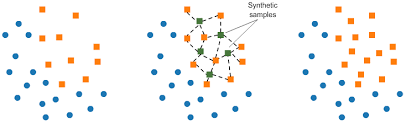

In [66]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

train_X_sm, train_y_sm = sm.fit_resample(train_X, train_y)

In [67]:
# K-Nearest Neighbors

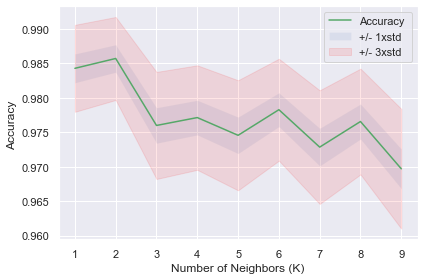

In [68]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(train_X_sm, train_y_sm)
    ypred_knn = knn.predict(test_X)
    mean_acc[n-1] = metrics.accuracy_score(test_y, ypred_knn)    
    std_acc[n-1]=np.std(ypred_knn==test_y)/np.sqrt(ypred_knn.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="red")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [69]:
print( "The best accuracy was with", np.round(mean_acc.max(),3), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.986 with k= 2


In [70]:
# After resampling(over) final prediction using k = 2

knn4 = KNeighborsClassifier(n_neighbors = 2)
knn4.fit(train_X_sm, train_y_sm)
ypred_knn4 = knn4.predict(test_X)

For model K-Nearest Neighbors:

accuracy score : 0.9857061177815895
Recall score : 0.8715083798882681
precision score : 0.8524590163934426
F1 score : 0.861878453038674

Confusion Matrix for K-Nearest Neighbors is:



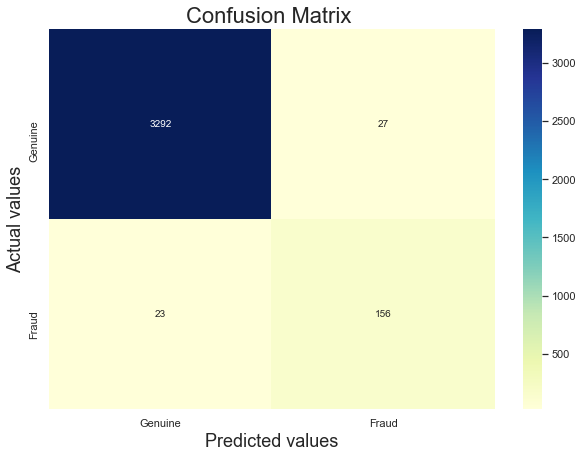

In [71]:
metrics_('K-Nearest Neighbors', test_y,ypred_knn4)
cf_plot('K-Nearest Neighbors', test_y,ypred_knn4)

In [72]:
# Logistic Regression

In [73]:
param_grid_lr4 = {'max_iter': [20, 50, 100, 200, 500, 1000],'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'class_weight': ['balanced']}

lr4_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr4, verbose=1, cv=10, n_jobs=-1)
lr4_grid.fit(train_X_sm, train_y_sm)
ypred_lr4 = lr4_grid.predict(test_X)
ypred_lr4_prob = lr4_grid.predict_proba(test_X)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


For model Logistic Regression after grid search(over):

accuracy score : 0.9716981132075472
Recall score : 0.888268156424581
precision score : 0.6680672268907563
F1 score : 0.7625899280575539

Confusion Matrix for Logistic Regression after grid search(over) is:



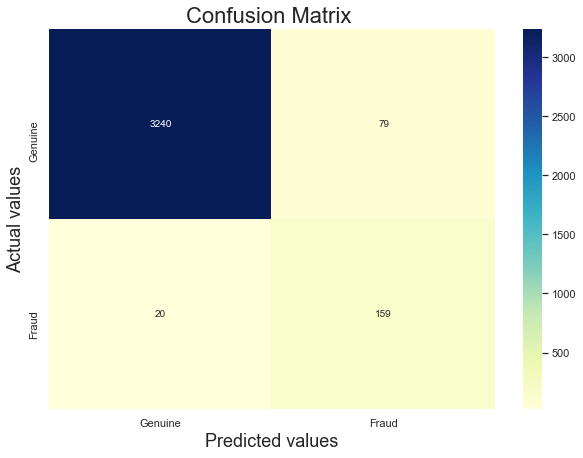

In [74]:
metrics_('Logistic Regression after grid search(over)', test_y,ypred_lr4)
cf_plot('Logistic Regression after grid search(over)', test_y,ypred_lr4)

In [75]:
# Random Forest

In [76]:
rf4 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf4.fit(train_X_sm, train_y_sm)
ypred_rf4 = rf4.predict(test_X)

In [77]:
metrics_('Random Forest(Smote)',test_y,ypred_rf4)

For model Random Forest(Smote):

accuracy score : 0.9897084048027445
Recall score : 0.8603351955307262
precision score : 0.9333333333333333
F1 score : 0.8953488372093025



Confusion Matrix for Random Forest(Smote) is:



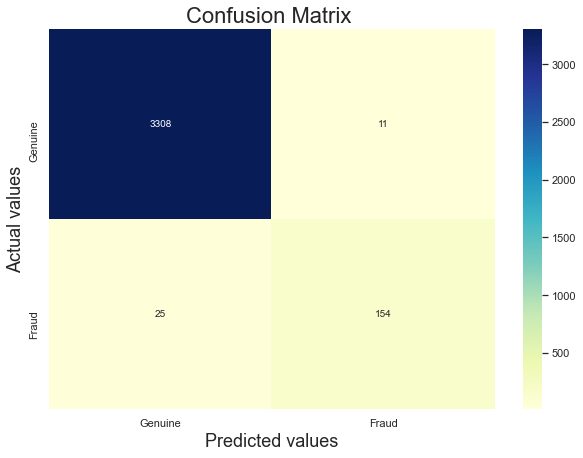

In [78]:
cf_plot('Random Forest(Smote)',test_y,ypred_rf4)

In [79]:
# XGB Classifier

[01:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For model XGBoost:

accuracy score : 0.9874213836477987
Recall score : 0.8715083798882681
precision score : 0.8813559322033898
F1 score : 0.8764044943820224

Confusion Matrix for XGBoost is:



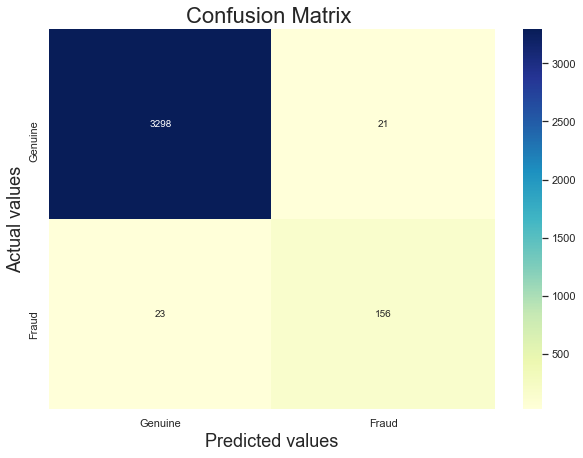

In [80]:
xgb1 = XGBClassifier()
xgb1.fit(train_X_sm, train_y_sm)
ypred_xgb1 = xgb1.predict(test_X)
metrics_('XGBoost', test_y, ypred_xgb1)
cf_plot('XGBoost', test_y, ypred_xgb1)

In [81]:
acc3 = np.round([metrics.accuracy_score(test_y,ypred_knn4),metrics.accuracy_score(test_y,ypred_lr4),
       metrics.accuracy_score(test_y,ypred_rf4)],3)
rc3 = np.round([metrics.recall_score(test_y,ypred_knn4),metrics.recall_score(test_y,ypred_lr4),
               metrics.recall_score(test_y,ypred_rf4)],3)
pr3 = np.round([metrics.precision_score(test_y,ypred_knn4),metrics.precision_score(test_y,ypred_lr4),
               metrics.precision_score(test_y,ypred_rf4)],3)
f1_3 = np.round([metrics.f1_score(test_y,ypred_knn4),metrics.f1_score(test_y,ypred_lr4),
               metrics.f1_score(test_y,ypred_rf4)],3)


dataframe3 = pd.DataFrame({'Models':Models , 'Recall/Sensitivity':rc3 , 'Accuracy_Score':acc3 , 
                           'Precision':pr3 , 'F1_Score':f1_3})

###  Now let's go over some comparisons between these scores dataframes

In [82]:
# Let's first try compairing the default score dataset with the score dataset obtained from undersampled classifiers

print("\nComparison between the default and undersampled scores datasets:")
X1 = dataframe.compare(dataframe1)
X1["Models"] = Models 
X1.reset_index(drop=True)
X1.set_index('Models')


Comparison between the default and undersampled scores datasets:


Recall/Sensitivity        Accuracy_Score        Precision  \
                            self  other           self  other      self   
Models                                                                    
K-NN                       0.849  0.877          0.992  0.980     0.987   
Logistic                   0.821  0.905          0.990  0.944     0.974   
Random Forest              0.849  0.883          0.992  0.973     0.987   

                     F1_Score         
               other     self  other  
Models                                
K-NN           0.770    0.913  0.820  
Logistic       0.475    0.891  0.623  
Random Forest  0.684    0.913  0.771

In [83]:
# compairing the default score dataset with the score dataset obtained from oversampled classifiers

print("\nComparison between the default and oversampled scores datasets:")
X2 = dataframe.compare(dataframe2)
X2["Models"] = Models;
X2.reset_index(drop=True)
X2.set_index('Models')


Comparison between the default and oversampled scores datasets:


Recall/Sensitivity        Accuracy_Score        Precision  \
                            self  other           self  other      self   
Models                                                                    
K-NN                       0.849  0.855          0.992  0.989     0.987   
Logistic                   0.821  0.883          0.990  0.974     0.974   
Random Forest              0.849  0.855            NaN    NaN       NaN   

                     F1_Score         
               other     self  other  
Models                                
K-NN           0.933    0.913  0.892  
Logistic       0.696    0.891  0.778  
Random Forest    NaN    0.913  0.916

In [84]:
# compairing the default score dataset with the score dataset obtained from SMOTE

print("\nComparison between the default and smote obtained scores datasets:")
X3 = dataframe.compare(dataframe3)
X3["Models"] = Models; X3.reset_index(drop=True)
X3.set_index('Models')


Comparison between the default and smote obtained scores datasets:


Recall/Sensitivity        Accuracy_Score        Precision  \
                            self  other           self  other      self   
Models                                                                    
K-NN                       0.849  0.872          0.992  0.986     0.987   
Logistic                   0.821  0.888          0.990  0.972     0.974   
Random Forest              0.849  0.860          0.992  0.990     0.987   

                     F1_Score         
               other     self  other  
Models                                
K-NN           0.852    0.913  0.862  
Logistic       0.668    0.891  0.763  
Random Forest  0.933    0.913  0.895

### Now for each classifiers, checking how much the score values differ and which technique better promises accuracy

In [85]:
re_dif = [X1['Recall/Sensitivity'].other[0]-X1['Recall/Sensitivity'].self[0],
          X2['Recall/Sensitivity'].other[0]-X2['Recall/Sensitivity'].self[0],
          X3['Recall/Sensitivity'].other[0]-X2['Recall/Sensitivity'].self[0]]
ac_dif = [X1.Accuracy_Score.other[0]-X1.Accuracy_Score.self[0],
          X2.Accuracy_Score.other[0]-X2.Accuracy_Score.self[0],
          X3.Accuracy_Score.other[0]-X2.Accuracy_Score.self[0]]
pr_dif = [X1.Precision.other[0]-X1.Precision.self[0],
          X2.Precision.other[0]-X2.Precision.self[0],
          X3.Precision.other[0]-X2.Precision.self[0]]
f1_dif = [X1.F1_Score.other[0]-X1.F1_Score.self[0],
          X2.F1_Score.other[0]-X2.F1_Score.self[0],
          X3.F1_Score.other[0]-X2.F1_Score.self[0]]

print("\nFor K-NN:")
KNN = pd.DataFrame({'Dataframes': ['Under_sampling','Over_sampling','Smote'], 'Recall diff':re_dif, 
                     'Accuracy diff':ac_dif, 'Precision diff':pr_dif, 'F1 diff':f1_dif})
KNN


For K-NN:


,Dataframes,Recall diff,Accuracy diff,Precision diff,F1 diff
0,Under_sampling,0.028,-0.012,-0.217,-0.093
1,Over_sampling,0.006,-0.003,-0.054,-0.021
2,Smote,0.023,-0.006,-0.135,-0.051


In [86]:
re_dif = [X1['Recall/Sensitivity'].other[1]-X1['Recall/Sensitivity'].self[1],
          X2['Recall/Sensitivity'].other[1]-X2['Recall/Sensitivity'].self[1],
          X3['Recall/Sensitivity'].other[1]-X2['Recall/Sensitivity'].self[1]]
ac_dif = [X1.Accuracy_Score.other[1]-X1.Accuracy_Score.self[1],
          X2.Accuracy_Score.other[1]-X2.Accuracy_Score.self[1],
          X3.Accuracy_Score.other[1]-X2.Accuracy_Score.self[1]]
pr_dif = [X1.Precision.other[1]-X1.Precision.self[1],
          X2.Precision.other[1]-X2.Precision.self[1],
          X3.Precision.other[1]-X2.Precision.self[1]]
f1_dif = [X1.F1_Score.other[1]-X1.F1_Score.self[1],
          X2.F1_Score.other[1]-X2.F1_Score.self[1],
          X3.F1_Score.other[1]-X2.F1_Score.self[1]]

print("\nFor Logistic Regression:")
Logistic = pd.DataFrame({'Dataframes': ['Under_sampling','Over_sampling','Smote'], 'Recall diff':re_dif, 
                     'Accuracy diff':ac_dif, 'Precision diff':pr_dif, 'F1 diff':f1_dif})
Logistic


For Logistic Regression:


,Dataframes,Recall diff,Accuracy diff,Precision diff,F1 diff
0,Under_sampling,0.084,-0.046,-0.499,-0.268
1,Over_sampling,0.062,-0.016,-0.278,-0.113
2,Smote,0.067,-0.018,-0.306,-0.128


> Higher the difference, better the resampling technique for the corresponding metric for the Logistic Regression. 

In [87]:
re_dif = [X1['Recall/Sensitivity'].other[2]-X1['Recall/Sensitivity'].self[2],
          X2['Recall/Sensitivity'].other[2]-X2['Recall/Sensitivity'].self[2],
          X3['Recall/Sensitivity'].other[2]-X2['Recall/Sensitivity'].self[2]]
ac_dif = [X1.Accuracy_Score.other[2]-X1.Accuracy_Score.self[2],
          X2.Accuracy_Score.other[2]-X2.Accuracy_Score.self[2],
          X3.Accuracy_Score.other[2]-X2.Accuracy_Score.self[2]]
pr_dif = [X1.Precision.other[2]-X1.Precision.self[2],
          X2.Precision.other[2]-X2.Precision.self[2],
          X3.Precision.other[2]-X2.Precision.self[2]]
f1_dif = [X1.F1_Score.other[2]-X1.F1_Score.self[2],
          X2.F1_Score.other[2]-X2.F1_Score.self[2],
          X3.F1_Score.other[2]-X2.F1_Score.self[2]]

print("\nFor Random Forest Classifier:")
Random_Forest = pd.DataFrame({'Dataframes': ['Under_sampling','Over_sampling','Smote'], 'Recall diff':re_dif, 
                     'Accuracy diff':ac_dif, 'Precision diff':pr_dif, 'F1 diff':f1_dif})
Random_Forest


For Random Forest Classifier:


,Dataframes,Recall diff,Accuracy diff,Precision diff,F1 diff
0,Under_sampling,0.034,-0.019,-0.303,-0.142
1,Over_sampling,0.006,NaN,NaN,0.003
2,Smote,0.011,NaN,NaN,-0.018


> Higher the difference, better the resampling technique for the corresponding metric for the Random Forest Classifier. 

### Check for accuracy gains from each classifiers

In [88]:
def accuracy_gain(model_name, ypred_def, ypred_final):
    
    print("\n{}:\n".format(model_name))
    print("gain in recall:",(metrics.recall_score(test_y,ypred_final) - metrics.recall_score(test_y,ypred_def)))
    print("gain in Accuracy score:",(metrics.accuracy_score(test_y,ypred_final) - metrics.accuracy_score(test_y,ypred_def)))
    print("gain in Precision:",(metrics.precision_score(test_y,ypred_final) - metrics.precision_score(test_y,ypred_def)))
    print("gain in F1 score:",(metrics.f1_score(test_y,ypred_final) - metrics.f1_score(test_y,ypred_def)))

In [89]:
print('\033[1m' + "** For Under Random Sampling:"+'\033[0m')
accuracy_gain('K-NN',ypred_knn1,ypred_knn2)
accuracy_gain('Logistic',ypred_lr,ypred_lr2)
accuracy_gain('Random Forest',ypred_rf,ypred_rf2)

print('\033[1m' + "\n** For Over Random Sampling:"+'\033[0m')
accuracy_gain('K-NN',ypred_knn1,ypred_knn3)
accuracy_gain('Logistic',ypred_lr,ypred_lr3)
accuracy_gain('Random Forest',ypred_rf,ypred_rf3)

print('\033[1m' + "\n** For SMOTE:"+'\033[0m')
accuracy_gain('K-NN',ypred_knn1,ypred_knn4)
accuracy_gain('Logistic',ypred_lr,ypred_lr4)
accuracy_gain('Random Forest',ypred_rf,ypred_rf4)
accuracy_gain('XGBoost',ypred_xgb,ypred_xgb1)

** For Under Random Sampling:

K-NN:

gain in recall: 0.027932960893854775
gain in Accuracy score: -0.011435105774728394
gain in Precision: -0.21740514387573207
gain in F1 score: -0.09306957087635948

Logistic:

gain in recall: 0.08379888268156432
gain in Accuracy score: -0.045740423098913685
gain in Precision: -0.4984366199918432
gain in F1 score: -0.2678321678321678

Random Forest:

gain in recall: 0.03351955307262566
gain in Accuracy score: -0.018582046883933723
gain in Precision: -0.303030303030303
gain in F1 score: -0.1421812055958398

** For Over Random Sampling:

K-NN:

gain in recall: 0.005586592178770999
gain in Accuracy score: -0.002287021154945723
gain in Precision: -0.054086157744694274
gain in F1 score: -0.020784633029531152

Logistic:

gain in recall: 0.06145251396648044
gain in Accuracy score: -0.015437392795883409
gain in Precision: -0.27747469148408554
gain in F1 score: -0.11258396775638146

Random Forest:

gain in recall: 0.005586592178770999
gain in Accuracy score: 0

### 
<h3 align="center"> || Final Report || <h3/>

<div class="alert alert-block alert-info" style='background:palegoldenrod'>
So, after having taken care of the imbalanced dataset , we came across some changes in our score values for each classifier. Let's have a recap and make some conclusions over our findings.</span>
    

1. For **K-NN model**, **under random sampling** does provide a better recall scores than default scenario, accuracy of +0.023 (from 0.849 to 0.872) has come up after applying this, but couldn't be of much help for other metrics. So, **under sampling** was somehow better than **over sampling** in case of K-NN.

2. For **Logistic Regression model**, most positive gain in recall_score has been achieved for **under random sampling**.

3. For **Random Forest**, A little positive rise occured in recall score for **under sampling** , followed by scores of **SMOTE**.
4. For **XGBoost Classifier**, **SMOTE** does offer a better positive rise in recall value than others.

> Well, after scooping through all of my findings, I conclude that a better prediction is coming from **LOGISTIC REGRESSION(Random UNDER Sampling)**